簡易

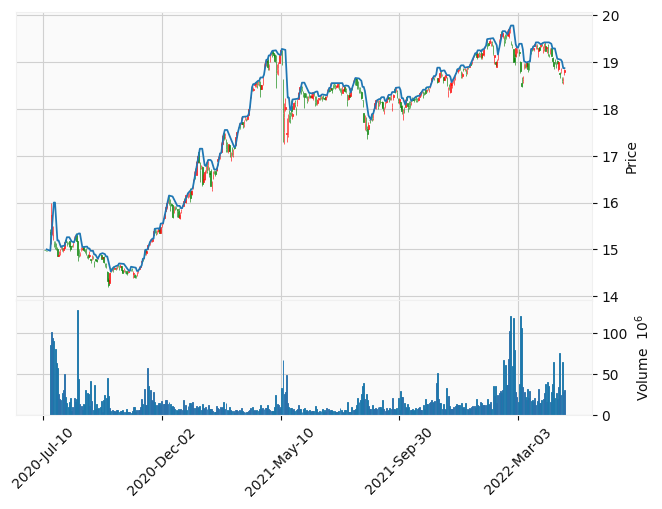

In [2]:
# 載入必要套件
from Data import getDataFM
from BackTest import ChartTrade
import mplfinance as mpf

# 取得回測資料
prod = "00878"
data = getDataFM(prod, "2013-01-01", "2023-12-15")

# 計算前N根K最高價
data["ceil"] = data.rolling(3)["high"].max().shift()

# 繪製副圖
addp = []
addp.append(mpf.make_addplot(data["ceil"]))

# 繪製K線圖與交易明細
ChartTrade(data, addp=addp)

完整版

/Users/samhsiao/Documents/PythonVenv/envDash/lib/python3.10/site-packages/mplfinance/_arg_validators.py:84: UserWarning: 


            POSSIBLE TO SEE DETAILS (Candles, Ohlc-Bars, Etc.)
   For more information see:
   - https://github.com/matplotlib/mplfinance/wiki/Plotting-Too-Much-Data
   
   TO SILENCE THIS WARNING, set `type='line'` in `mpf.plot()`
   OR set kwarg `warn_too_much_data=N` where N is an integer 
   LARGER than the number of data points you want to plot.

  warnings.warn('\n\n ================================================================= '+


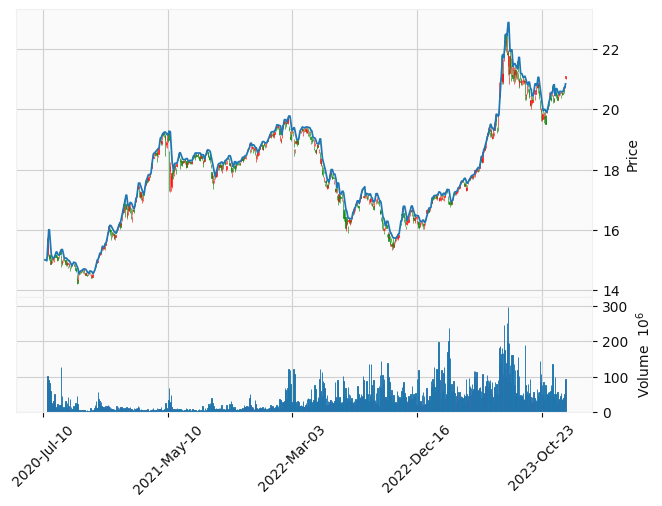

In [1]:
# 載入必要套件
import mplfinance as mpf
import pandas as pd
import yfinance as yf
import os

'''自訂函數'''


# 繪製交易記錄圖
def ChartTrade(data, trade=pd.DataFrame(), addp=[], v_enable=True):
    addp = addp.copy()
    data1 = data.copy()
    # 如果有交易紀錄，則把交易紀錄與K線彙整
    if trade.shape[0] > 0:
        # 將物件複製出來，不影響原本的交易明細變數
        trade1 = trade.copy()
        # 取出進場明細，透過時間索引將資料合併
        buy_order_trade = trade1[[2, 3]]
        buy_order_trade = buy_order_trade.set_index(2)
        buy_order_trade.columns = ["buy_order"]
        buy_order_trade = buy_order_trade.drop_duplicates()
        # 取出出場明細，透過時間索引將資料合併
        buy_cover_trade = trade1[[4, 5]]
        buy_cover_trade = buy_cover_trade.set_index(4)
        buy_cover_trade.columns = ["buy_cover"]
        buy_cover_trade = buy_cover_trade.drop_duplicates()
        # 將交易紀錄與K線資料彙整
        data1 = pd.concat([data1, buy_order_trade, buy_cover_trade], axis=1)

        # 將交易紀錄透過副圖的方式繪製
        addp.append(
            mpf.make_addplot(
                data1["buy_order"],
                type="scatter",
                color="#FF4500",
                marker="^",
                markersize=50,
            )
        )
        addp.append(
            mpf.make_addplot(
                data1["buy_cover"],
                type="scatter",
                color="#16982B",
                marker="v",
                markersize=50,
            )
        )
    # 繪製圖表
    mcolor = mpf.make_marketcolors(up="r", down="g", inherit=True)
    mstyle = mpf.make_mpf_style(base_mpf_style="yahoo", marketcolors=mcolor)
    mpf.plot(data1, addplot=addp, style=mstyle, type="candle", volume=v_enable)


# 取得資料：本地或是 Yahoo
def getDataFM(prod, st, en):
    # 檔案路徑
    bakfile = f"data/YF_{prod}_{st}_{en}_stock_daily_adj.csv"
    # 假如已經有 Excel 資料檔案
    if os.path.exists(bakfile):
        # 讀取 Excel 資料檔案
        data = pd.read_csv(bakfile, index_col="Date", parse_dates=True)
    # 假如 Excel 資料檔案不存在
    else:
        # 透過 yf 下載
        data = yf.download(f"{prod}.TW", start=st, end=en)
        # 下載的資料是英文的，處理欄位名稱，轉換為小寫
        # 轉換部分不包含索引，所以日期還是大寫開頭的 Date
        data.columns = [i.lower() for i in data.columns]
        # 假如下載後沒有資料
        if data.empty:
            print("無法從 Yahoo Finance 下載資料")
            # 傳回一個空的 pd
            return pd.DataFrame()
        # 假如資料 data 不是空的，依照指定路徑存擋
        data.to_csv(bakfile)
    # 存檔後，傳回資料
    return data


if __name__ == "__main__":
    # 取得回測資料
    prod = "00878"
    data = getDataFM(prod, "2013-01-01", "2023-12-15")

    # 計算前N根K最高價
    data["ceil"] = data.rolling(3)["high"].max().shift()

    # 繪製副圖
    addp = []
    addp.append(mpf.make_addplot(data["ceil"]))

    # 繪製K線圖與交易明細
    ChartTrade(data, addp=addp)
